## Classification Assignment- 3
Instructions
1.	Follow the instructions in question carefully.
2.	A Jupyter notebook along with the output for each cell is expected. Please do not submit zip or rar files.
3.	Any assignment submitted using other python IDEs are not considered for grading.
 
Problem statement:
In this assignment, you will be working with a dummy advertising data set, which indicates whether an internet user clicked on an advertisement on a company website. Create a model that will predict whether a user will click on an ad based on the profile of that user.
 
This data set contains the following features:
 
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not the consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad
 
For the dataset (Advertising dataset), implement the Decision Tree classifier using Python. [9M]
Dataset: advertising.csv   
 



QUESTIONS:
 
Q-1: Load the dataset and print the metadata in the notebook. 1M
 
Q-2: Print a heatmap to check NULL values. 1M
 
Q-3: Perform stratified splitting of train and test data. 1M
 
Q-4: Build a classifier model using the Decision Tree algorithm. 2M
 
Q-5: Print confusion matrix and classification report before and after pruning the Decision tree. (1+1)M
 
Q-6 Plot the final decision tree model. 1M
 
Q-7: Find out the stratified cross-validation accuracy 1M.
  
For any Queries, Contact: murtuza.dahodwala@wilp.bits-pilani.ac.in

 ## Q-1: Load the dataset and print the metadata in the notebook. 1M

In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, log_loss
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

In [2]:
# Preprocessing Input data
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [4]:
#Describe the dataset
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
#look at random sample
df.sample(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
481,83.26,40,70225.60,187.76,Decentralized foreground infrastructure,Alanview,1,Tonga,2016-01-02 14:36:03,0
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,2016-06-03 01:14:41,1
890,76.65,31,61117.50,238.43,Function-based executive moderator,West Dennis,0,Pakistan,2016-04-18 07:00:38,0
419,60.70,43,79332.33,192.60,Multi-tiered multi-state moderator,Mataberg,1,Palau,2016-06-06 22:41:24,0
870,45.82,27,64410.80,171.24,Expanded full-range synergy,Adamside,1,Eritrea,2016-02-10 20:43:38,1
786,74.07,22,50950.24,165.43,Cross-group non-volatile secured line,Joneston,1,Ghana,2016-03-22 04:13:35,0
79,55.13,45,55605.92,111.71,Customizable executive software,Lake Conniefurt,0,Ukraine,2016-02-17 21:55:29,1
723,48.22,40,73882.91,214.33,Inverse national core,Turnerville,0,Norfolk Island,2016-03-22 19:14:47,0
288,45.05,42,66348.95,141.36,Digitized contextually-based product,South Kyle,0,French Southern Territories,2016-05-05 11:09:29,1
757,48.86,35,62463.70,128.37,Universal empowering adapter,Elizabethbury,1,Saint Martin,2016-01-04 00:44:57,1


In [6]:
#Check for shape of the data
df.shape

(1000, 10)

## Q-2: Print a heatmap to check NULL values. 1M

In [7]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:>

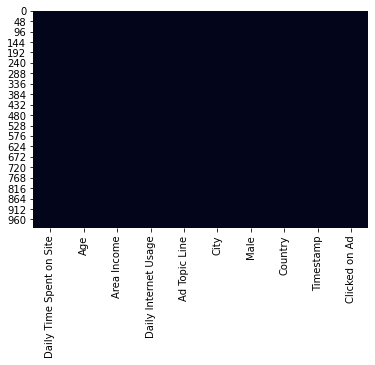

In [8]:
sns.heatmap(df.isnull(), cbar=False)

There are no null values

In [9]:
#check for duplicates
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


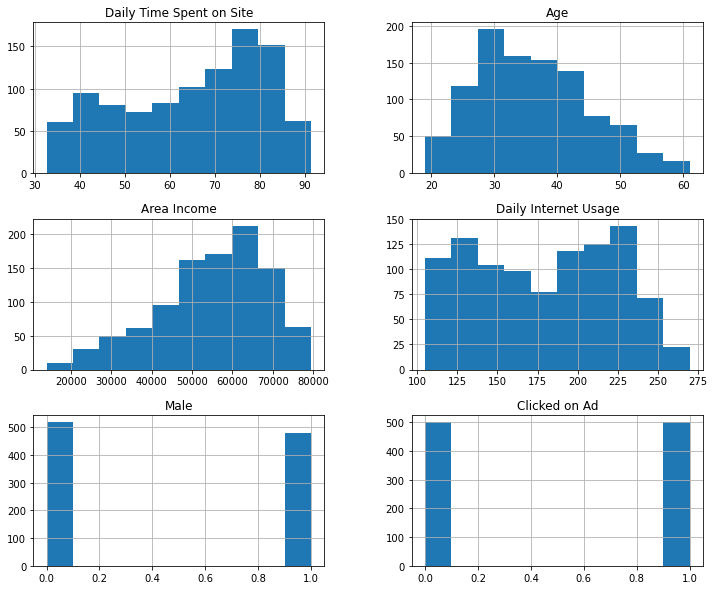

In [10]:
#plot histogram for attributes of type number(float and int)
df.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

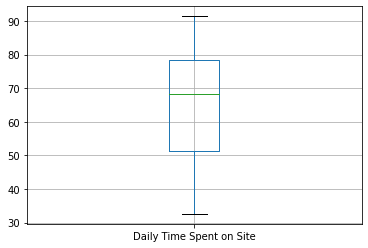

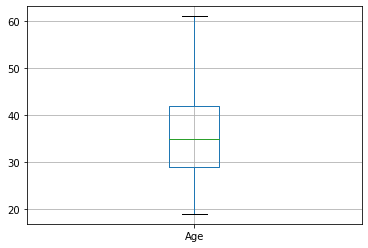

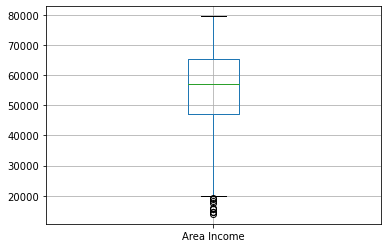

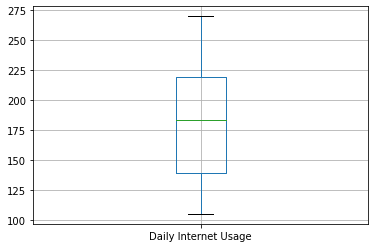

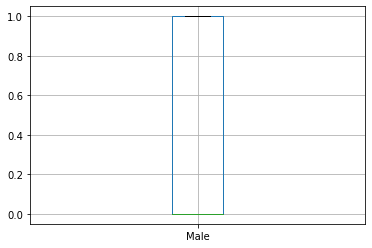

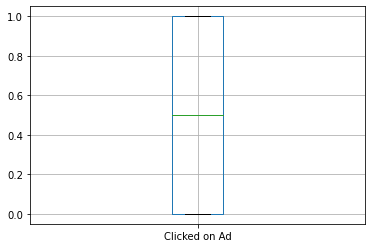

In [11]:
#check for Outliers
df_number = df.select_dtypes(include = 'number')
for col in df_number:
    df.boxplot(column=[col])
    plt.show()

In [12]:
#Find correlation between features and plot heatmap for all the numerical values.
#lets plot heatmap using spearman correlation

spearman_corr= df.corr('spearman')
print(spearman_corr)

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.316862     0.283134   
Age                                      -0.316862  1.000000    -0.135954   
Area Income                               0.283134 -0.135954     1.000000   
Daily Internet Usage                      0.514108 -0.370864     0.339160   
Male                                     -0.015922 -0.023155    -0.014369   
Clicked on Ad                            -0.744873  0.486337    -0.467224   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.514108 -0.015922      -0.744873  
Age                                  -0.370864 -0.023155       0.486337  
Area Income                           0.339160 -0.014369      -0.467224  
Daily Internet Usage                  1.000000  0.028204      -0.776607  
Male                                  0.028204  1.000000      -0.038027  
Clicked on Ad   

In [13]:
#Find correlation between features and plot heatmap for all the numerical values.
spearman_corr= df.corr('spearman')
print(spearman_corr)

#Flatten the corr matrix
df1 = spearman_corr.stack().reset_index()
df1.columns = ['FEATURE_1','FEATURE_2','corr']
# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df1['FEATURE_1']==df1['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df1 = df1[~mask_dups]
print(df1)


                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.316862     0.283134   
Age                                      -0.316862  1.000000    -0.135954   
Area Income                               0.283134 -0.135954     1.000000   
Daily Internet Usage                      0.514108 -0.370864     0.339160   
Male                                     -0.015922 -0.023155    -0.014369   
Clicked on Ad                            -0.744873  0.486337    -0.467224   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.514108 -0.015922      -0.744873  
Age                                  -0.370864 -0.023155       0.486337  
Area Income                           0.339160 -0.014369      -0.467224  
Daily Internet Usage                  1.000000  0.028204      -0.776607  
Male                                  0.028204  1.000000      -0.038027  
Clicked on Ad   

In [14]:
#print those with corr = 1
print(df1[abs(df1['corr']) >= 0.5])

                   FEATURE_1             FEATURE_2      corr
3   Daily Time Spent on Site  Daily Internet Usage  0.514108
5   Daily Time Spent on Site         Clicked on Ad -0.744873
23      Daily Internet Usage         Clicked on Ad -0.776607


In [15]:
#convert data to numerical values
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df['Timestamp'] = df['Timestamp'].dt.dayofyear

In [16]:
data = df.copy()

In [17]:
df_dummies = pd.get_dummies(data[['Ad Topic Line','City','Country']])
df.drop(['Ad Topic Line','City','Country'], axis=1,inplace = True)
df_num = pd.concat([df, df_dummies], axis=1)
print(df_num.columns)
print(df_num.dtypes)


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad',
       'Ad Topic Line_Adaptive 24hour Graphic Interface',
       'Ad Topic Line_Adaptive asynchronous attitude',
       'Ad Topic Line_Adaptive context-sensitive application',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela', 'Country_Vietnam', 'Country_Wallis and Futuna',
       'Country_Western Sahara', 'Country_Yemen', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=2213)
Daily Time Spent on Site     float64
Age                            int64
Area Income                  float64
Daily Internet Usage         float64
Male                           int64
                              ...   
Country_Wallis and Futuna      uint8
Country_Western Sahara         uint8
Country_Yemen                  uint8
Country_Zambia                 uint8
Country_Zimbabwe               uint8
Length

## Q-3: Perform stratified splitting of train and test data. 1M

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [19]:
#Split features and labels 
X = df_num.drop(columns="Clicked on Ad")
y = df_num['Clicked on Ad']

In [20]:
# Do the test and train data split using stratify sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify = y, test_size=0.4)

## Q-4: Build a classifier model using the Decision Tree algorithm. 2M

In [21]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
#Build the classifier model
classifier = DecisionTreeClassifier()
#classifier = DecisionTreeClassifier(criterion = "gini", 
#            random_state = 42,max_depth=3, min_samples_leaf=5) 
classifier = classifier.fit(X_train,y_train)

In [23]:
#predict
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1]


 
## Q-5: Print confusion matrix and classification report before and after pruning the Decision tree. (1+1)M


In [24]:
#Evaluate Model
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [25]:
print('Before Pruning')

Before Pruning


In [26]:
#Evaluate Results
cm = confusion_matrix(y_test,y_pred)
cm

array([[193,   7],
       [  8, 192]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  0.9625


In [28]:
report = classification_report(y_test, y_pred, output_dict=True)

In [29]:
df_acc = pd.DataFrame(report).transpose()
print(df_acc)

              precision  recall  f1-score   support
0              0.960199  0.9650  0.962594  200.0000
1              0.964824  0.9600  0.962406  200.0000
accuracy       0.962500  0.9625  0.962500    0.9625
macro avg      0.962512  0.9625  0.962500  400.0000
weighted avg   0.962512  0.9625  0.962500  400.0000


In [30]:
feature_cols = X.columns
labels = y.unique()
print(labels)

[0 1]


In [31]:
print('After Pruning')
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
report = classification_report(y_test, pred, output_dict=True)
df_acc = pd.DataFrame(report).transpose()
print(df_acc)
print('------------------------------------------\n')
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))
report = classification_report(y_test,pred, output_dict=True)
df_acc = pd.DataFrame(report).transpose()
print(df_acc)

After Pruning
Criterion=gini 0.955
              precision  recall  f1-score  support
0                 0.955   0.955     0.955  200.000
1                 0.955   0.955     0.955  200.000
accuracy          0.955   0.955     0.955    0.955
macro avg         0.955   0.955     0.955  400.000
weighted avg      0.955   0.955     0.955  400.000
------------------------------------------

Criterion=entropy 0.96
              precision  recall  f1-score  support
0              0.955446   0.965  0.960199   200.00
1              0.964646   0.955  0.959799   200.00
accuracy       0.960000   0.960  0.960000     0.96
macro avg      0.960046   0.960  0.959999   400.00
weighted avg   0.960046   0.960  0.959999   400.00


Using Entropy to select features with highest information gain

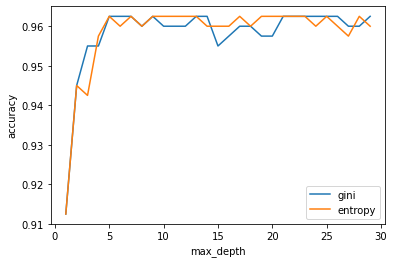

In [32]:
#plot accuracy using Gini and entropy as criteria
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree_gini.fit(X_train, y_train)
 pred = dtree_gini.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree_entropy.fit(X_train, y_train)
 pred = dtree_entropy.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Accuracy obtained from entropy is little higher than gini

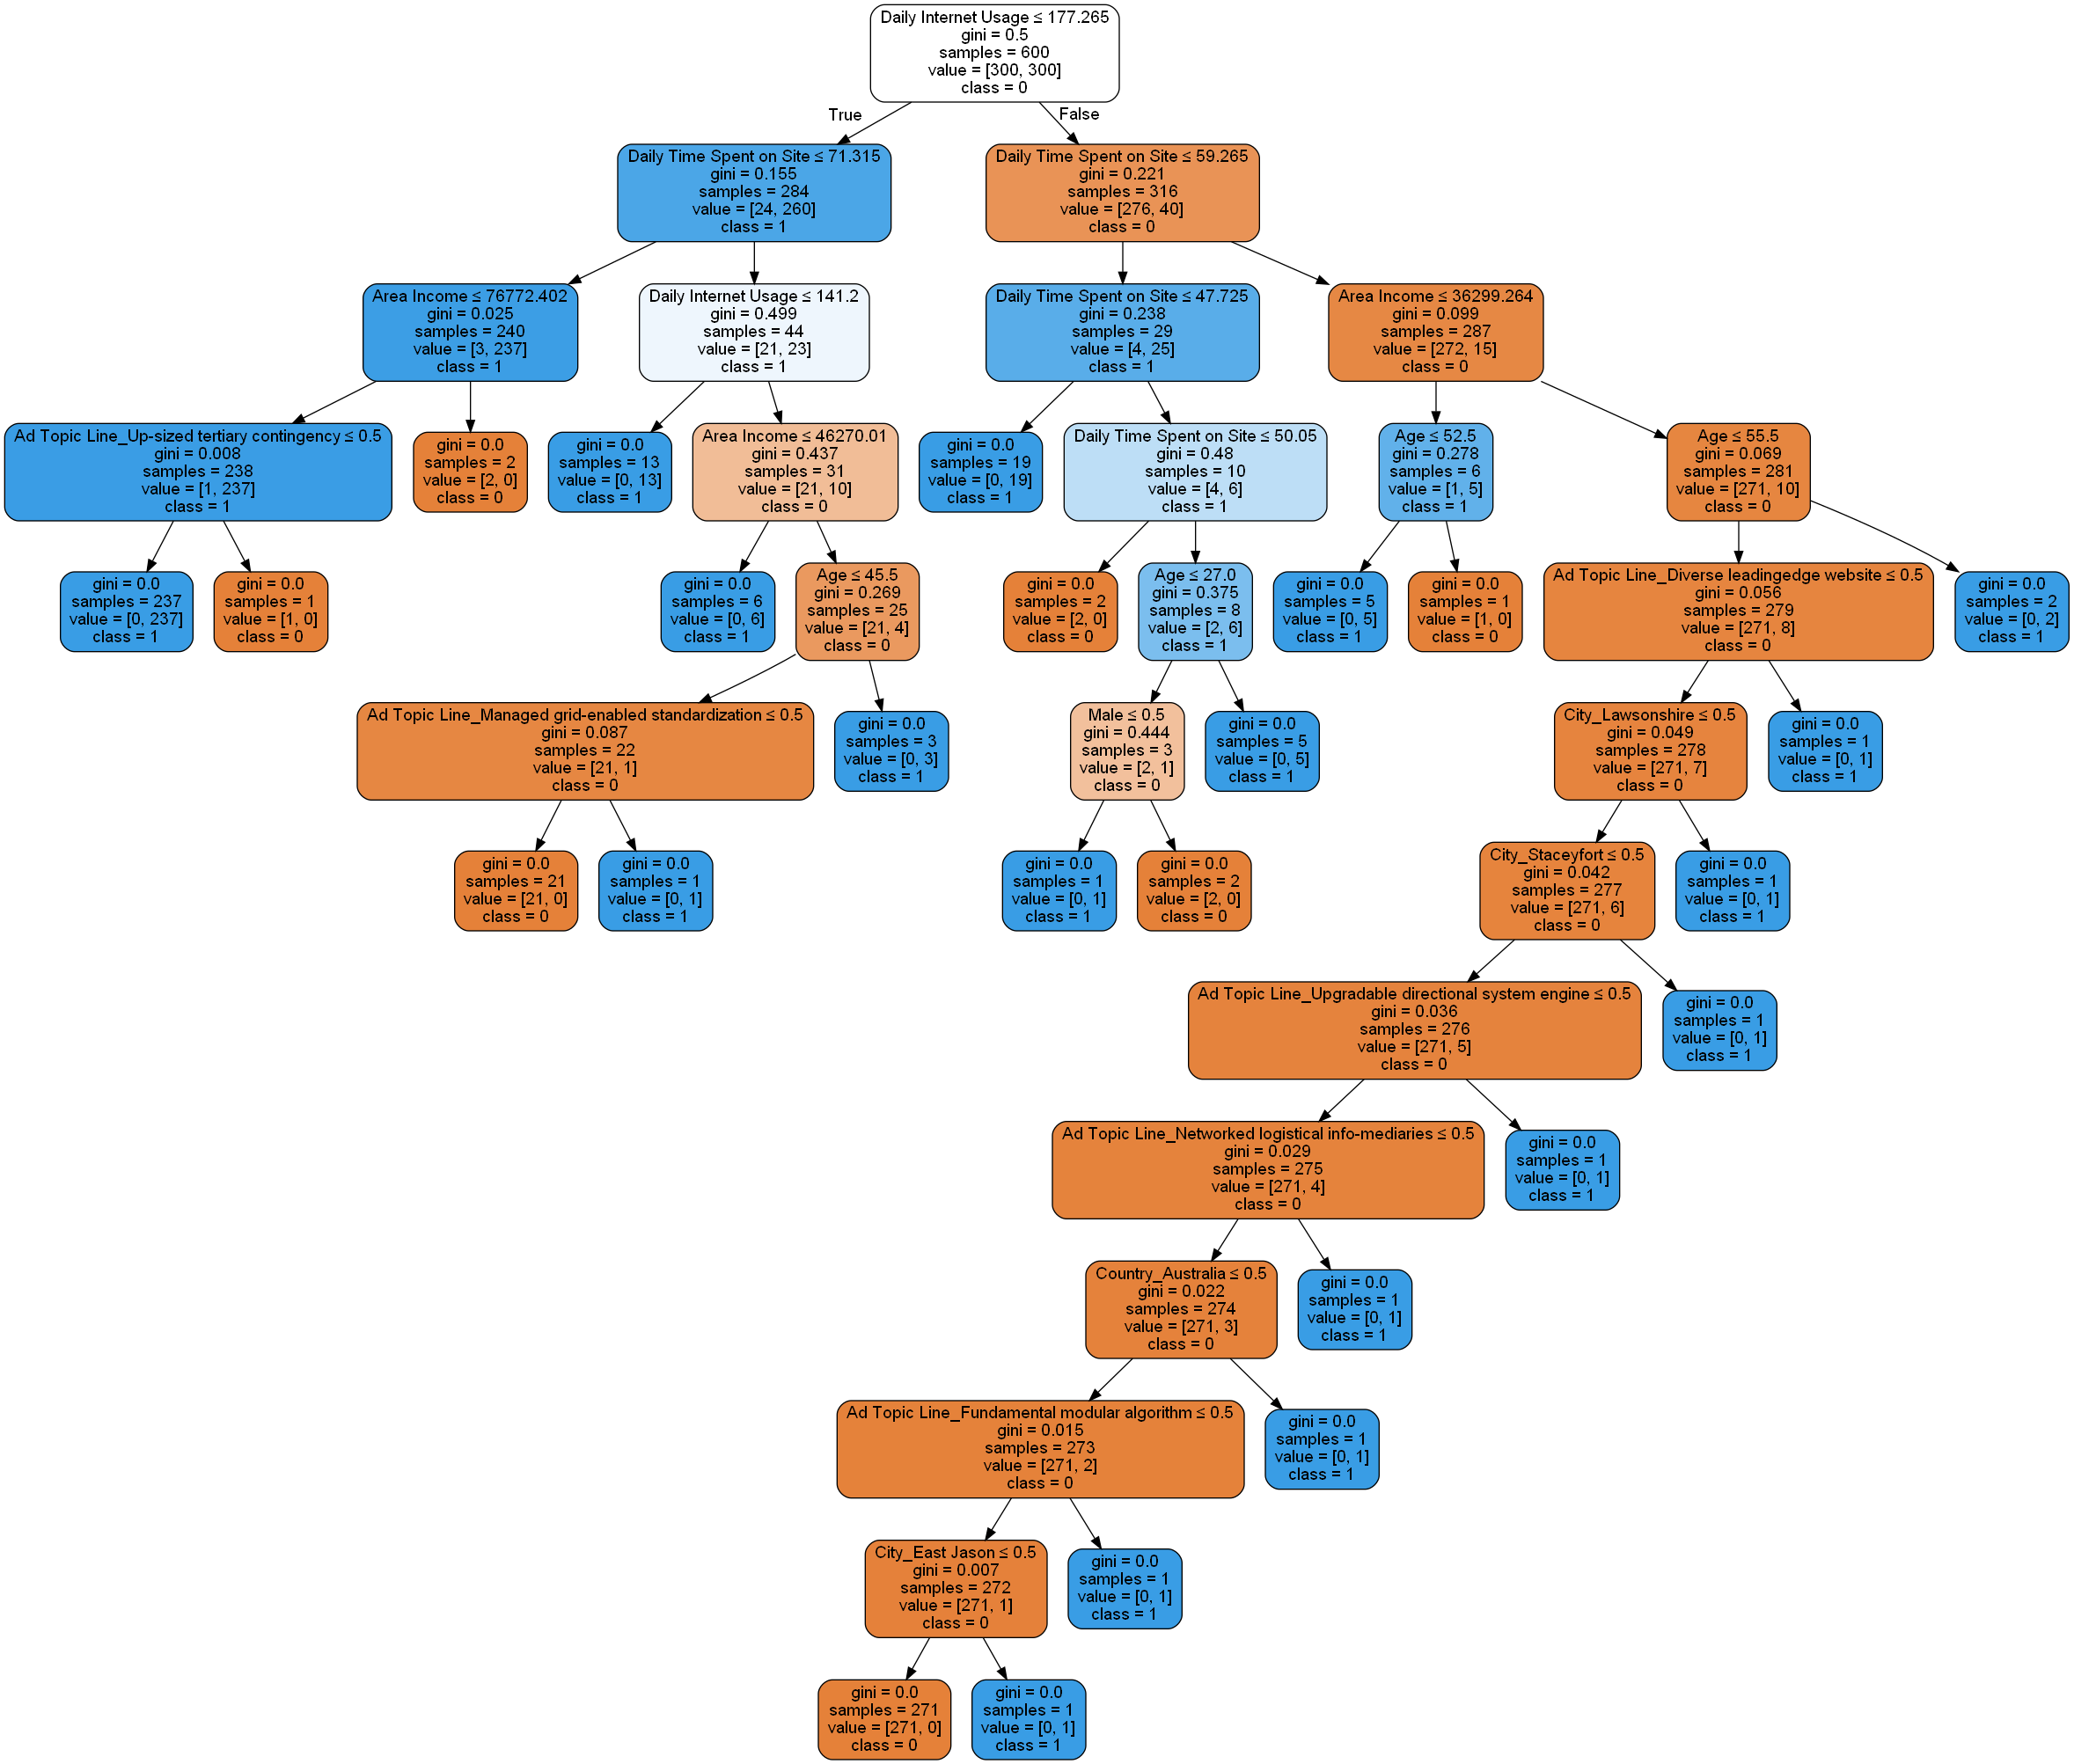

In [33]:
#plot Decision tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,
               special_characters=True,feature_names= feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
#os.system('dot -Tpng random.dot -o random.png')

graph.write_png('random.png')
Image(graph.create_png())

## Q-6 Plot the final decision tree model. 1M

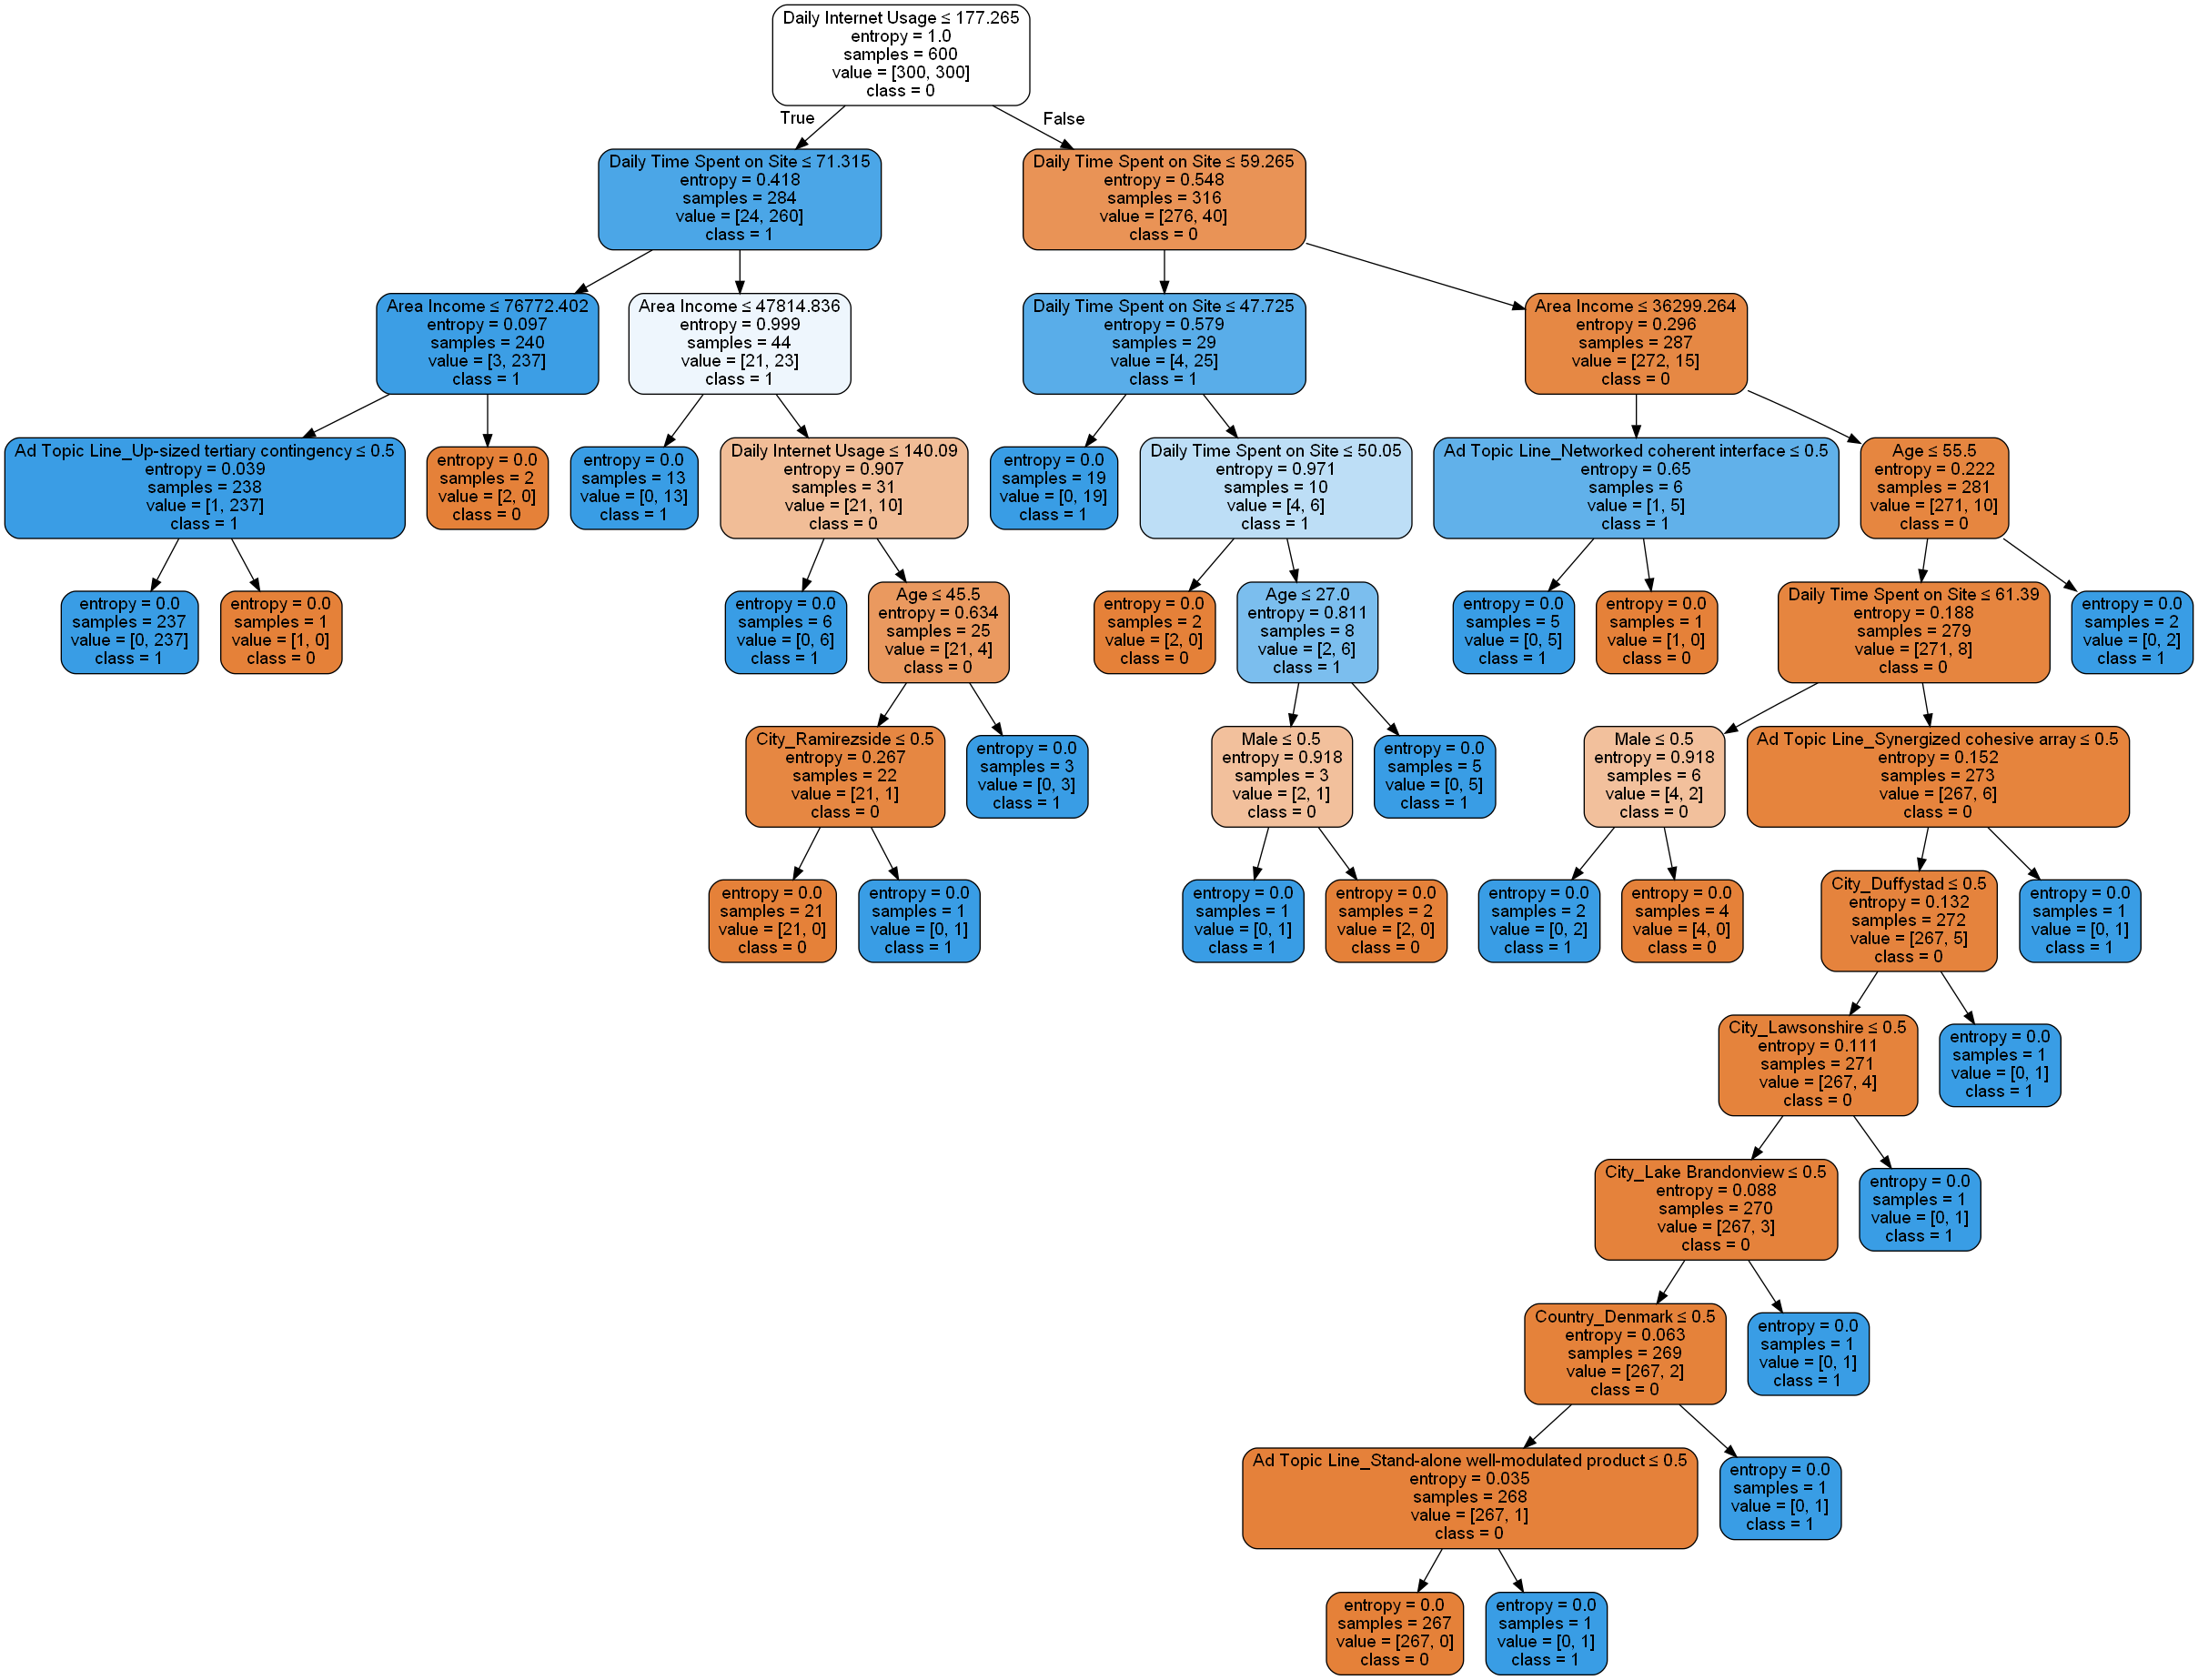

In [34]:
#plot decision tree for decision tree classifier using Entropy 
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree_entropy, out_file=dot_data,filled=True, rounded=True,
               special_characters=True,feature_names= feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

graph.write_png('random.png')
Image(graph.create_png())

## Q-7: Find out the stratified cross-validation accuracy 1M.

In [35]:
#import libs
from sklearn import preprocessing
from statistics import mean, stdev
#Build the classifier model
#classifier_cv = DecisionTreeClassifier()
classifier_cv = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 42,max_depth=3, min_samples_leaf=5) 

# Feature Scaling for input features. 
scaler = preprocessing.MinMaxScaler() 
x_scaled = scaler.fit_transform(X) 
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42) 
lst_accu_stratified = [] 

   
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    classifier_cv.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(classifier_cv.score(x_test_fold, y_test_fold)) 

In [36]:
# Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

List of possible accuracy: [0.98, 0.96, 0.92, 0.94, 0.88, 0.96, 0.94, 0.94, 0.92, 0.94, 0.94, 0.96, 0.96, 0.9, 0.98, 0.92, 0.9, 0.98, 0.96, 0.96]

Maximum Accuracy That can be obtained from this model is: 98.0 %

Minimum Accuracy: 88.0 %

Overall Accuracy: 94.19999999999999 %

Standard Deviation is: 0.028209740758897615


The accuracy obtained using StratifiedKfold 20 folds is almost same around 94%